In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhiakashabrina","key":"57a78360ac128ebad06304eed8e7b302"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d athallahreyhan/museum-basuki

 99% 998M/0.99G [00:14<00:00, 90.2MB/s]
100% 0.99G/0.99G [00:14<00:00, 71.6MB/s]


In [7]:
!unzip -q /content/museum-basuki.zip \
  && rm museum-basuki.zip

In [8]:
!pip install split-folders

In [9]:
import splitfolders
input_folder='/content/Museum Basoeki'

splitfolders.ratio(input_folder, output="Museum Basoeki",
                   seed=42, ratio=(.7,.2,.1),
                  group_prefix=None)

Copying files: 315 files [00:04, 65.38 files/s]


Image Augmentation

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 45,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.25,
                                   zoom_range = 0.5,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224),
                                                      shuffle = True)

  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224),
                                                                shuffle=False)

  return train_generator, validation_generator

In [11]:
TRAINING_DIR = '/content/Museum Basoeki/train'
VALIDATION_DIR = '/content/Museum Basoeki/val'

In [12]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 217 images belonging to 10 classes.
Found 62 images belonging to 10 classes.


In [13]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             image_size=(224,224))

Found 217 files belonging to 10 classes.


In [14]:
class_names = train_dataset.class_names
print(class_names)

['Banteng', 'Ratu pantai selatan', 'air', 'batu batu sejarah', 'bencana', 'buruh', 'menyosong hari esok', 'penari sulawesi', 'ratu juliana', 'telaga sarangan']


In [15]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [16]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    verbose = 2,
                    validation_steps=len(validation_generator))

Epoch 1/100
7/7 - 42s - loss: 2.3145 - accuracy: 0.0876 - val_loss: 2.2748 - val_accuracy: 0.0968 - 42s/epoch - 6s/step
Epoch 2/100
7/7 - 33s - loss: 2.2784 - accuracy: 0.1152 - val_loss: 2.2324 - val_accuracy: 0.0968 - 33s/epoch - 5s/step
Epoch 3/100
7/7 - 37s - loss: 2.2285 - accuracy: 0.1659 - val_loss: 2.1493 - val_accuracy: 0.3226 - 37s/epoch - 5s/step
Epoch 4/100
7/7 - 37s - loss: 2.1412 - accuracy: 0.2581 - val_loss: 2.0237 - val_accuracy: 0.3065 - 37s/epoch - 5s/step
Epoch 5/100
7/7 - 35s - loss: 2.0005 - accuracy: 0.3180 - val_loss: 1.8544 - val_accuracy: 0.3065 - 35s/epoch - 5s/step
Epoch 6/100
7/7 - 38s - loss: 1.8320 - accuracy: 0.3134 - val_loss: 1.6600 - val_accuracy: 0.4355 - 38s/epoch - 5s/step
Epoch 7/100
7/7 - 37s - loss: 1.6897 - accuracy: 0.3917 - val_loss: 1.4773 - val_accuracy: 0.4516 - 37s/epoch - 5s/step
Epoch 8/100
7/7 - 38s - loss: 1.5445 - accuracy: 0.4240 - val_loss: 1.3275 - val_accuracy: 0.5645 - 38s/epoch - 5s/step
Epoch 9/100
7/7 - 35s - loss: 1.4734 - a

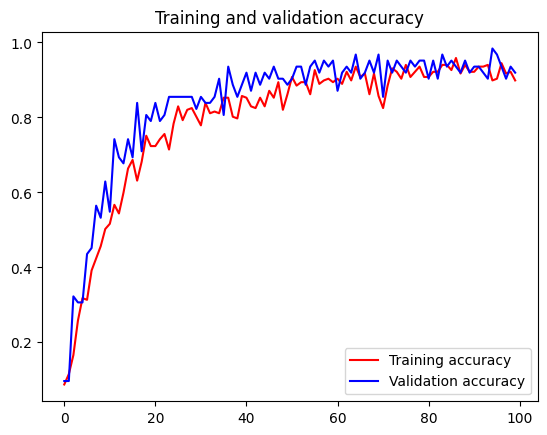

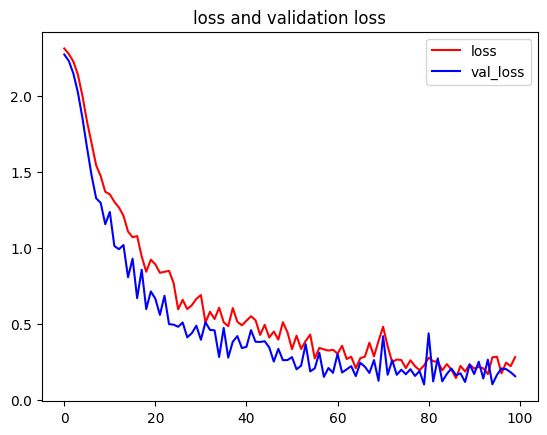

<Figure size 640x480 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

**TRANSFER LEARNING**

We utilize transfer learning with InceptionV3 for image classification, leveraging pre-trained knowledge to recognize and categorize images accurately.

In [33]:
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-12-19 15:11:09--  https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94765736 (90M) [application/octet-stream]
Saving to: ‘/tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/resnet50_weigh 100%[===================>]  90.38M   141MB/s    in 0.6s    

2023-12-19 15:11:09 (141 MB/s) - ‘/tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [94765736/94765736]



In [34]:
# Import the Resnet model
from tensorflow.keras.applications import ResNet50

# Path ke berkas ResNet50 pre-trained weights yang telah kamu unduh
local_weights_file = '/tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Create an instance of the ResNet50 model from the local pre-trained weights
model = ResNet50(weights=local_weights_file, include_top=False)

In [35]:
from tensorflow.keras.applications import ResNet50

def create_pre_trained_model(local_weights_file):
    pre_trained_model = ResNet50(weights=local_weights_file,
                            include_top=False,
                            input_shape=(224, 224, 3))

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

    return pre_trained_model


and then we print the InceptionV3 model summary

In [36]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [37]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.95 and logs.get('val_accuracy')>=0.95):
      print("\nReached 95.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [38]:
def output_of_last_layer(pre_trained_model):
    last_desired_layer = pre_trained_model.get_layer('conv5_block3_out')
    print('last layer output shape: ', last_desired_layer.output_shape)
    last_output = last_desired_layer.output
    print('last layer output: ', last_output)

    return last_output


In [39]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 2048)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")


In [40]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


we add our architecture like we flatten it first and the we add dense layer and the multiclass dense layer with softmax activation. after that we compile it with adam optimazer and low learning rate (0.0001) and use categorical crossentropy loss function.

In [41]:
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense (256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense (10, activation='softmax')(x)
model2 = Model(pre_trained_model.input, x)
model2.summary()

model2.compile(optimizer=keras.optimizers.Adam(0.0001),  # Low learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [42]:
callbacks = myCallback()
history = model2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks = [callbacks]
                    )

Epoch 1/100
7/7 - 42s - loss: 3.5785 - accuracy: 0.0968 - val_loss: 2.3025 - val_accuracy: 0.1290 - 42s/epoch - 6s/step
Epoch 2/100
7/7 - 36s - loss: 2.6102 - accuracy: 0.1429 - val_loss: 2.1652 - val_accuracy: 0.1935 - 36s/epoch - 5s/step
Epoch 3/100
7/7 - 36s - loss: 2.2357 - accuracy: 0.1889 - val_loss: 2.1579 - val_accuracy: 0.3226 - 36s/epoch - 5s/step
Epoch 4/100
7/7 - 36s - loss: 2.2182 - accuracy: 0.1843 - val_loss: 2.1030 - val_accuracy: 0.2581 - 36s/epoch - 5s/step
Epoch 5/100
7/7 - 36s - loss: 2.1858 - accuracy: 0.1797 - val_loss: 2.0720 - val_accuracy: 0.3065 - 36s/epoch - 5s/step
Epoch 6/100
7/7 - 36s - loss: 2.1886 - accuracy: 0.2028 - val_loss: 2.0784 - val_accuracy: 0.1935 - 36s/epoch - 5s/step
Epoch 7/100
7/7 - 37s - loss: 2.1909 - accuracy: 0.1705 - val_loss: 2.0636 - val_accuracy: 0.2097 - 37s/epoch - 5s/step
Epoch 8/100
7/7 - 36s - loss: 2.1840 - accuracy: 0.1843 - val_loss: 2.0319 - val_accuracy: 0.2742 - 36s/epoch - 5s/step
Epoch 9/100
7/7 - 35s - loss: 2.1645 - a

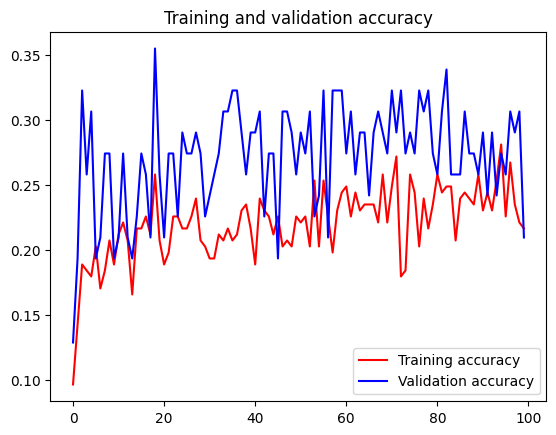

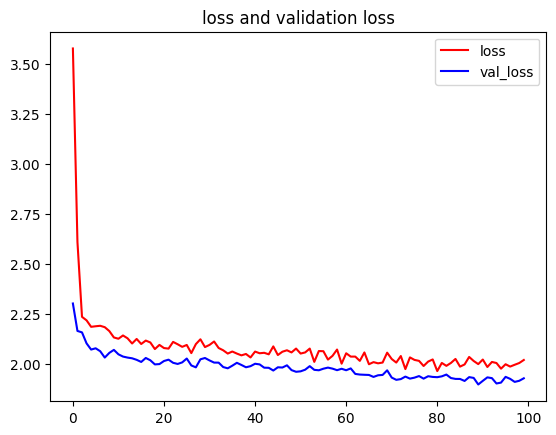

<Figure size 640x480 with 0 Axes>

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

**FINE TUNING**

Fine-tuning in transfer learning means taking a smart model that already knows a lot and giving it a bit of extra training so it becomes really good at a specific task.

In [44]:
from tensorflow import keras
pre_trained_model.trainable = True
#model2.summary()

model2.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
                loss = keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy']
)


model2.fit(train_generator,
           validation_data=validation_generator,
           epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 71s 5s/step - loss: 7.4906 - accuracy: 0.1659 - val_loss: 1.9865 - val_accuracy: 0.1935
Epoch 2/10
7/7 [==============================] - 38s 5s/step - loss: 4.9698 - accuracy: 0.1336 - val_loss: 2.0057 - val_accuracy: 0.2258
Epoch 3/10
7/7 [==============================] - 39s 6s/step - loss: 3.8462 - accuracy: 0.2074 - val_loss: 2.0934 - val_accuracy: 0.1935
Epoch 4/10
7/7 [==============================] - 34s 5s/step - loss: 3.0429 - accuracy: 0.2719 - val_loss: 2.2638 - val_accuracy: 0.1935
Epoch 5/10
7/7 [==============================] - 36s 5s/step - loss: 2.7969 - accuracy: 0.3088 - val_loss: 2.3856 - val_accuracy: 0.1935
Epoch 6/10
7/7 [==============================] - 38s 6s/step - loss: 2.2789 - accuracy: 0.3272 - val_loss: 2.5000 - val_accuracy: 0.1290
Epoch 7/10
7/7 [==============================] - 36s 6s/step - loss: 1.8792 - accuracy: 0.4700 - val_loss: 2.8632 - val_accuracy: 0.1129
Epoch 8/10
7/7 [=============================

**TESTING**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
    path = paths
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    proba = model2.predict(images)[0]
    maxx = proba.max()
    plt.imshow(img)
    plt.show()

    for (label, p) in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))

    max_index = np.argmax(proba)
    max_proba = proba[max_index]
    max_label = list(labels)[max_index]

    if max_proba >= 0.7:
        print('\nResult:')
        print("{}: {:.2f}%".format(max_label, max_proba * 100))
    else:
        print('\nResult:')
        print('Hasil tidak ditemukan!')

**SAVING MODEL**

we save our model into tensorflow format and we convert it to model.tflite afterthat we use quantization for minimize our model

In [52]:
#Save the model in TensorFlow format
model2.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
import tensorflow as tf

# Load the TensorFlow model
model = tf.keras.models.load_model('/content/my_model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)